<a href="https://colab.research.google.com/github/AnkitaSK/AB-Image-Classification/blob/BitWhisperer/mainCIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [114]:
from keras.backend import clear_session
clear_session()

Data Preprocessing



In [115]:
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()



In [116]:

# separating training and validation set
X_valid = X_train[:10000]
X_train = X_train[10000:]

y_valid = y_train[:10000]
y_train = y_train[10000:]

print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


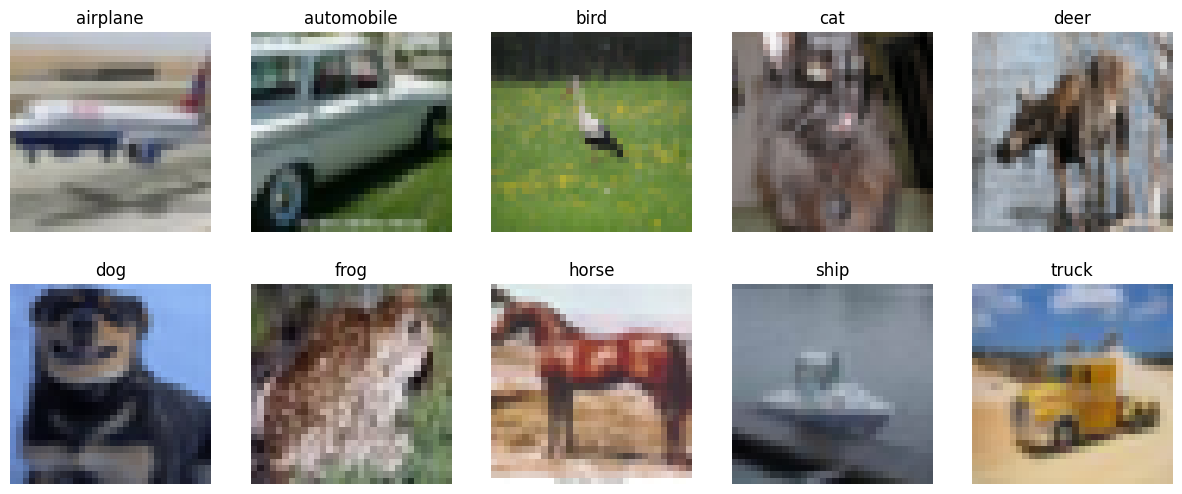

In [117]:

#Visualize the images in CIFAR-10 dataset. Create a 10 x 10 plot showing 10 random samples from each class.

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'] # Define the class names

# Create a 10x10 grid of plots to display the images and their labels
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
# Flatten the axes into a 1D array
axes = axes.flatten()

# Set random seed for reproducibility
np.random.seed(42)

# Loop through each class and select 10 random samples
for class_index in range(10):
    class_samples = np.where(y_train == class_index)[0]
    random_sample = np.random.choice(class_samples, 1, replace=False)
    sample_index = random_sample[0]
    ax = axes[class_index]
    ax.imshow(X_train[sample_index])
    ax.set_title(class_names[class_index])
    ax.axis('off')


plt.show()


Data Normalization and Agumentation


In [118]:
#normalize the data by dividing by 255 to scale the pixel values between 0 and 1

X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255
X_valid = X_valid.astype('float32') / 255

print('shape of x train normalized', X_train.shape)
print('shape of x test normalized', X_test.shape)
print('shape of x train validation', X_valid.shape)


shape of x train normalized (40000, 32, 32, 3)
shape of x test normalized (10000, 32, 32, 3)
shape of x train validation (10000, 32, 32, 3)


In [119]:
from tensorflow.keras.utils import to_categorical

# Change the labels from integer to categorical data.
print('Original (integer) label for the first training sample: ', y_train[0])

# Convert the labels to one-hot encoded form.
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
y_valid = to_categorical(y_valid, num_classes=10)

print('After conversion to categorical one-hot encoded labels: ', y_train[0])

Original (integer) label for the first training sample:  [1]
After conversion to categorical one-hot encoded labels:  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


Data augmentation

In [120]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=15,          # Random rotation by 15 degrees
    width_shift_range=0.1,      # Randomly shift images horizontally by 10%
    height_shift_range=0.1,     # Randomly shift images vertically by 10%
    horizontal_flip=True,       # Randomly flip images horizontally
    zoom_range=0.1              # Random zoom by 10%
)

# Fit the data generator to the training data
datagen.fit(X_train)

Model Architecture

In [121]:
# design CNN suitable for image classification
# Include convolutional layers, pooling layers, and fully connected layers.
from tensorflow.keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# define model
def cnn_model():
  model = Sequential()

  # conv block 1: 32 filters, Maxpool
  model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
  model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  # conv block 2: 64 filters, Maxpool
  model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
  model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  # conv block 3: 64 filters, Maxpool
  model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
  model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  # flatten the convolutional features
  model.add(Flatten())
  model.add(Dense(512, activation='relu'))
  # fully connected 10 output layers because we have 10 classes in our dataset
  model.add(Dense(10, activation='softmax'))

  model.build()

  return model

In [122]:
model = cnn_model()
model.build

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


<function keras.src.models.sequential.Sequential.build(input_shape=None)>

In [123]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 8, 8, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 669,354 (2.55 MB)

 Trainable params: 669,354 (2.55 MB)

 Non-trainable params: 0 (0.00 B)

In [124]:
# compile the model
# we use categorical_crossentropy since our labels are one-hot encoded
model.compile(
    optimizer= 'adam',#'adam',#'rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [125]:
from dataclasses import dataclass

@dataclass(frozen=True)
class TrainingConfig:
    EPOCHS:        int = 50
    BATCH_SIZE:    int = 256

In [126]:
# train the model
history = model.fit(
    X_train,
    y_train,
    batch_size = TrainingConfig.BATCH_SIZE,
    epochs=TrainingConfig.EPOCHS,
    verbose=1,
    validation_data=(X_valid, y_valid)
)

Epoch 1/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.2678 - loss: 1.9690 - val_accuracy: 0.4913 - val_loss: 1.4049
Epoch 2/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5163 - loss: 1.3392 - val_accuracy: 0.5598 - val_loss: 1.2126
Epoch 3/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6009 - loss: 1.1185 - val_accuracy: 0.6291 - val_loss: 1.0352
Epoch 4/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6661 - loss: 0.9552 - val_accuracy: 0.6559 - val_loss: 0.9765
Epoch 5/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7100 - loss: 0.8312 - val_accuracy: 0.6901 - val_loss: 0.8835
Epoch 6/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7466 - loss: 0.7222 - val_accuracy: 0.6949 - val_loss: 0.8618
Epoch 7/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7696 - loss: 0.6570 - val_accuracy: 0.6999 - val_loss: 0.8891
Epoch 8/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8012 - loss: 0.5610 - val_accuracy: 0

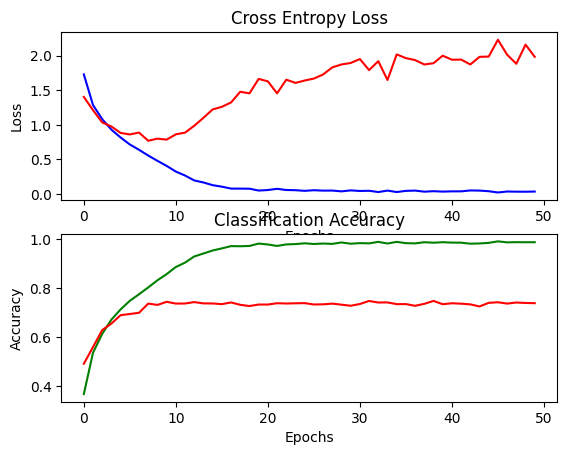

In [127]:
#plot loss
plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='red', label='val')
plt.xlabel('Epochs')
plt.ylabel('Loss')

# plot accuracy
plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='green', label='train')
plt.plot(history.history['val_accuracy'], color='red', label='val')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


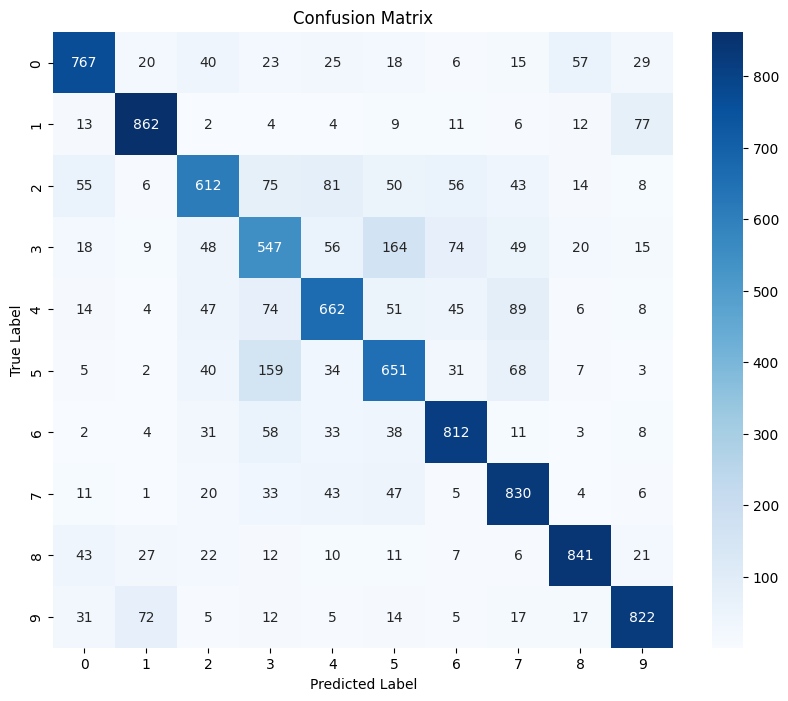

In [128]:
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns

y_pred = model.predict(X_test)

predictions = np.argmax(y_pred, axis=1)
gt = np.argmax(y_test, axis=1)
cm = confusion_matrix(gt, predictions)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [129]:
from sklearn.metrics import classification_report, accuracy_score

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print('Text loss: ', test_loss)
print('Test accuracy: ', test_accuracy)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7429 - loss: 2.0571
Text loss:  2.061521291732788
Test accuracy:  0.7405999898910522


In [130]:
# adding Dropout to the model
from tensorflow.keras import layers

# define model
def cnn_model_dropout():
  model = Sequential()

  # conv block 1: 32 filters, Maxpool
  model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
  model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(layers.Dropout(0.25))

  # conv block 2: 64 filters, Maxpool
  model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
  model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(layers.Dropout(0.25))

  # conv block 3: 64 filters, Maxpool
  model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
  model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(layers.Dropout(0.25))

  # flatten the convolutional features
  model.add(Flatten())
  model.add(Dense(512, activation='relu'))
  model.add(layers.Dropout(0.5))
  # fully connected 10 output layers because we have 10 classes in our dataset
  model.add(Dense(10, activation='softmax'))

  return model

In [131]:
# define model checkpoint callback
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(
    filepath='best_model.keras',
    monitor="val_loss",
    mode="min",
    save_best_only=True,
    verbose=1
)

In [132]:
# early stopping
# for us, applying early stop reduces the val_accuracy
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
    )

In [133]:
# create the model
model_dropout = cnn_model_dropout()
model_dropout.summary()

# compile dropout mode
model_dropout.compile(
    optimizer='adam',#'sgd',#'adam',#'rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# train dropout model
history_dropout = model_dropout.fit(
    X_train,
    y_train,
    batch_size = TrainingConfig.BATCH_SIZE,
    epochs=TrainingConfig.EPOCHS,
    verbose=1,
    validation_data=(X_valid, y_valid),
    callbacks=[checkpoint]
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 8, 8, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 8, 8, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 669,354 (2.55 MB)

 Trainable params: 669,354 (2.55 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.2331 - loss: 2.0552
Epoch 1: val_loss improved from inf to 1.89002, saving model to best_model.keras
157/157 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - accuracy: 0.2335 - loss: 2.0541 - val_accuracy: 0.3247 - val_loss: 1.8900
Epoch 2/50
148/157 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4165 - loss: 1.6007
Epoch 2: val_loss improved from 1.89002 to 1.33795, saving model to best_model.keras
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4180 - loss: 1.5962 - val_accuracy: 0.5242 - val_loss: 1.3380
Epoch 3/50
151/157 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5021 - loss: 1.3674
Epoch 3: val_loss improved from 1.33795 to 1.21728, saving model to best_model.keras
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5027 - loss: 1.3660 - val_accuracy: 0.5530 - val_loss: 1.2173
Epoch 4/50
151/157 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5539 - loss: 1.2300
Epoch 4: val_loss improved from 1.21728 to 1.04510,

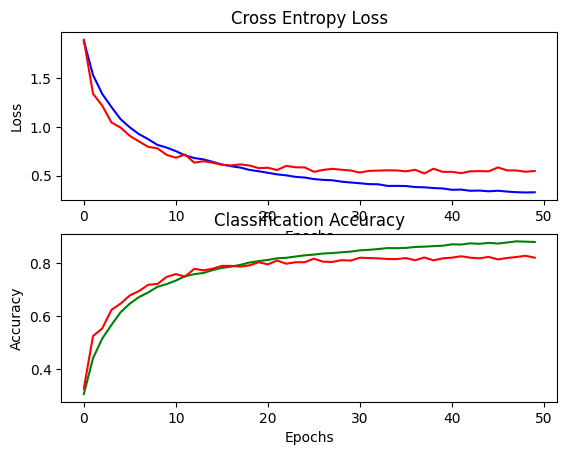

In [134]:
# TODO - optimise
#plot loss
plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history_dropout.history['loss'], color='blue', label='train')
plt.plot(history_dropout.history['val_loss'], color='red', label='val')
plt.xlabel('Epochs')
plt.ylabel('Loss')

# plot accuracy
plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history_dropout.history['accuracy'], color='green', label='train')
plt.plot(history_dropout.history['val_accuracy'], color='red', label='val')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


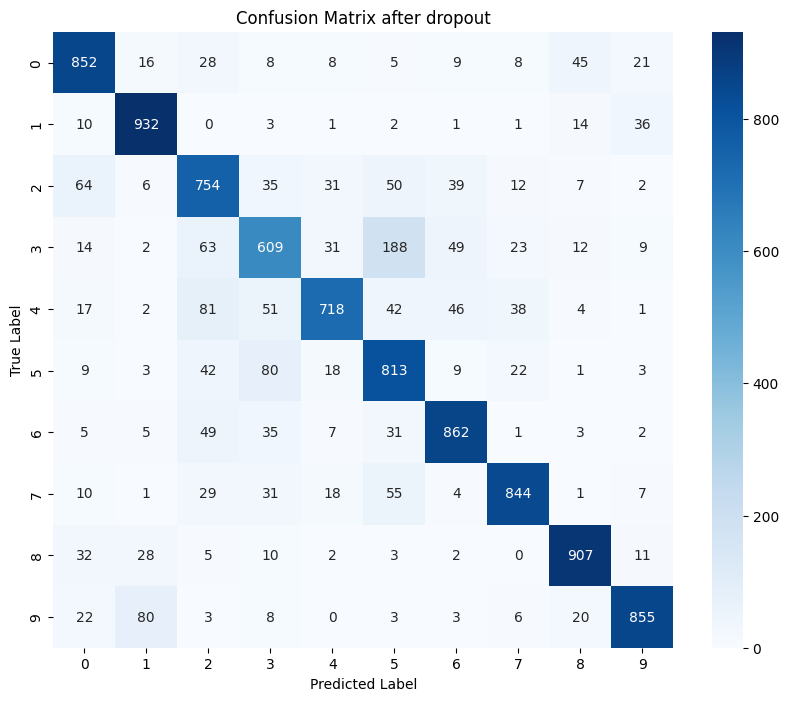

In [135]:
# TODO optimise
y_pred_dropout = model_dropout.predict(X_test)

predictions = np.argmax(y_pred_dropout, axis=1)
gt_dropout = np.argmax(y_test, axis=1)
cm_dropout = confusion_matrix(gt_dropout, predictions)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm_dropout, annot=True, fmt="d", cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix after dropout')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [136]:
test_loss, test_accuracy = model_dropout.evaluate(X_test, y_test)
print('Test loss: ', test_loss)
print('Test accuracy: ', test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8193 - loss: 0.5805
Test loss:  0.5912902355194092
Test accuracy:  0.8145999908447266


Transfer learning

In [162]:
import torch
from torchsummary import summary
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from torchvision.transforms import ToTensor, Normalize
from torch.utils.data import DataLoader
import torchvision.models as models

In [163]:
# choose pretrained model
base_model = model_dropout

In [164]:
# freeze all layers
for layer in base_model.layers:
    layer.trainable = False

In [165]:
base_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 8, 8, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 8, 8, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,008,064 (7.66 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 669,354 (2.55 MB)

 Optimizer params: 1,338,710 (5.11 MB)

In [166]:
# custom classification model on top of pretrained model
from tensorflow.keras import layers, models

custom_model = Sequential()

custom_model.add(base_model)

custom_model.add(layers.GlobalAveragePooling2D())

custom_model.add(Dense(128, activation='relu'))
custom_model.add(layers.Dropout(0.5))
custom_model.add(Dense(10, activation='softmax'))

custom_model.compile(
    optimizer= 'adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# train dropout model
history_custom_model = custom_model.fit(
    X_train,
    y_train,
    epochs=10,
    verbose=1,
    validation_data=(X_valid, y_valid)
)

Epoch 1/10


ValueError: Input 0 of layer "global_average_pooling2d" is incompatible with the layer: expected ndim=4, found ndim=2. Full shape received: (32, 10)

In [153]:
# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:10]:
  layer.trainable = False

In [154]:
#Recompile the model with a lower learning rate for fine-tuning
from tensorflow.keras.optimizers import Adam

custom_model.compile(
    optimizer=Adam(learning_rate=0.000001),  # Lower learning rate
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [155]:
#Fine-tune the model with the unfrozen layers

history_fine = custom_model.fit(
    X_train,
    y_train,
    epochs=10,  # Fine-tune for a few more epochs
    validation_data=(X_valid, y_valid)
)

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8859 - loss: 0.0000e+00 - val_accuracy: 0.8254 - val_loss: 0.0000e+00
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8888 - loss: 0.0000e+00 - val_accuracy: 0.8254 - val_loss: 0.0000e+00
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8861 - loss: 0.0000e+00 - val_accuracy: 0.8255 - val_loss: 0.0000e+00
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8904 - loss: 0.0000e+00 - val_accuracy: 0.8255 - val_loss: 0.0000e+00
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8879 - loss: 0.0000e+00 - val_accuracy: 0.8255 - val_loss: 0.0000e+00
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8893 - loss: 0.0000e+00 - val_accuracy: 0.8254 - val_loss: 0.0000e+00
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8893 - loss: 0.0000e+00 - val_accuracy: 0.8256 - val_loss: 0.0000e+00
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━

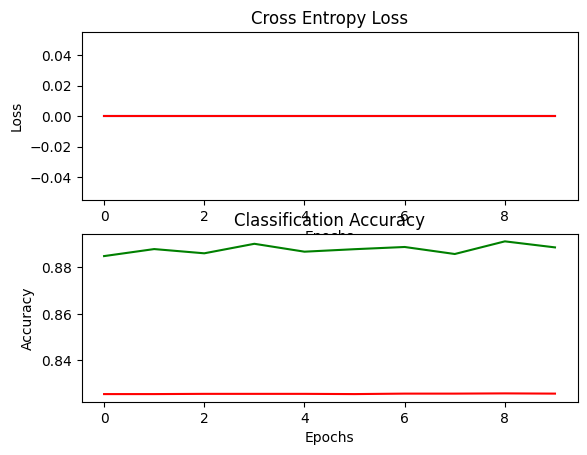

In [156]:
#plot loss
plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history_fine.history['loss'], color='blue', label='train')
plt.plot(history_fine.history['val_loss'], color='red', label='val')
plt.xlabel('Epochs')
plt.ylabel('Loss')

# plot accuracy
plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history_fine.history['accuracy'], color='green', label='train')
plt.plot(history_fine.history['val_accuracy'], color='red', label='val')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.show()

In [161]:
results = custom_model.evaluate(X_test, y_test)
# print('Test loss: ', test_loss)
# print('Test accuracy: ', test_acc)
print(results[2])
print(results[3])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8238 - loss: 0.0000e+00
0.8202999830245972
0.8202999830245972
